<hr style="border:2px solid #808080"> </hr>
<center><h1 style="color:#03122E;"> IMT2111 Tarea 0  </h1></center>
<center><h1 style="color:#173F8A;"> Nombre: , Fecha: </h3></center>
<center><h1 style="color:#0176DE;"> Pontificia Universidad Catolica de Chile</h3></center>
<hr style="border:2px solid #808080"> </hr>

<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ejemplo-sencillo-1" data-toc-modified-id="Ejemplo-sencillo-1-1">Ejemplo sencillo 1</a></span><ul class="toc-item"><li><span><a href="#Solucion:" data-toc-modified-id="Solucion:-1.1">Solucion:</a></span></li></ul></li><li><span><a href="#Ejemplo-sencillo-2" data-toc-modified-id="Ejemplo-sencillo-2-2">Ejemplo sencillo 2</a></span><ul class="toc-item"><li><span><a href="#Solucion" data-toc-modified-id="Solucion-2.1">Solucion</a></span></li></ul></li></ul></div>

# Ayudantía 0
---

Veremos reglas de como responder un problema en Jupyter Notebook. Esto es más que nada para un tema de formato y saber como reportar resultados. Primero, importamos las librerías necesarias

In [2]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd

### Para centrar los resultados solamente ###
from IPython.display import display, HTML

display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))
#############################################

pd.set_option("precision", 3) # Para saber cuantos decimales mostrar en los dataframes

Una vez terminado, si las rutinas programadas no son muy costosas correr <b>todo</b> el Notebook. Esto se puede hacer por:

`Kernel` > `Restart & Run All`

De esta forma pueden verificar que las variables utilizadas en celdas anteriores no causen problemas y se obtienen los mismos resultados siempre.

Otra forma de hacer esto es seccionar su Jupyter por secciones y reiniciar el Kernel cada vez que ingresen a una sección nueva.

<p style="font-size:2em">¡Comenten sus resultados!</p>

Es importante hacer esto siempre. Además, cuando entreguen sus Jupyter entreguen los resultados impresos.

## Ejemplo sencillo 1

Consideremos la matriz de Lehmer $L^n$ de $n\times n$ con entradas:

$$L^{n}_{ij} = \frac{\min(i,j)}{\max(i,j)}$$ 

Queremos estudiar y reportar el número de condición de la matriz a medida que crece el tamaño de la matriz. Primero, creamos las funciones y documentamos que hacen:

### Solucion:

In [20]:
def Lehmer(n):
    """
    Crea la matriz de Lehmer de nxn
    input: n
    output: matrix
    """
    L = np.zeros((n, n), dtype=float)
    for i in range(n):
        for j in range(n):
            L[i,j] = (min(i, j) + 1)/(max(i, j) + 1)
    return L

def Routine(n_list, norm_list=[1, 2, np.inf]):
    """
    Genera la tabla de resultados
    input:  n_list: Tamaño de las matrices
            norm_list: Normas en las cual medir el número de condición
    output: DataFrame con los resultados. Una tabla (tamaño matriz x norma p)
    """
    m, n = len(n_list), len(norm_list)
    result_table = np.zeros((m, n), dtype=float)
    
    for i, n in enumerate(n_list):
        L = Lehmer(n)
        for j, p in enumerate(norm_list):
            result_table[i, j] = np.linalg.cond(L, p=p)
    
    idx = pd.Index(n_list, name="Tamaño (n) de la matriz")
    data = pd.DataFrame(data=result_table, index=idx, columns=['$$\kappa_1$$','$$\kappa_2$$', '$$\kappa_\infty$$'])
    return data

In [21]:
results = Routine(np.arange(1, 10))
display(results)

,$$\kappa_1$$,$$\kappa_2$$,$$\kappa_\infty$$
Tamaño (n) de la matriz,,,
1,1.000,1.000,1.000
2,3.000,3.000,3.000
3,8.667,6.663,8.667
4,16.500,12.206,16.500
5,26.800,19.655,26.800
6,39.667,29.040,39.667
7,54.571,40.387,54.571
8,72.417,53.717,72.417
9,92.381,69.047,92.381


También se pueden crear tablas en Markdown! Pero son mucho más manuales :c

| Tamaño (n) de la matriz  | $$\kappa_1$$ | $$\kappa_2$$ | $$\kappa_\infty$$ |
|---|---|---|---| 
| <b>1</b> | 1.000 | 1.000 | 1.000 |
| <b>2</b> | 3.000 | 3.000 | 3.000 |
| <b>3</b> | 8.667 | 6.663 | 8.667 |
|$$\vdots$$|$$\vdots$$|$$\vdots$$|$$\vdots$$|

Un comentario posible a estos resultados es que vemos que a medida que el tamaño de la matriz aumenta, su número de condición aumenta.

## Ejemplo sencillo 2

Queremos graficar la función 

$$f(x) = \cos(x)$$

y su expansión de Taylor de grado 2 centrada en 0: 

$$p(x) = 1 - \frac{1}{2}x^2$$

### Solucion 
Primero, creamos las funciones a graficar. Dos opciones:

1. Usamos las funciones `lambda` de python
2. Definimos igual que siempre

In [4]:
def f(x):
    return np.cos(x)

p = lambda x: 1 - 0.5*x*x

Para graficar funciones con matplotlib, necesitamos crear una grilla sobre la cual evaluar las funciones. Esta se puede crear a mano, pero hay algunas funciones que facilitan la vida. Por ejemplo, `linspace` de numpy.

In [5]:
x_array = np.linspace(-1, 1, num=100)

Ahora, basta hacer el gráfico. Esto por lo general es libre, pero siempre, SIEMPRE, tener en cuenta:

- Tamaño del gráfico: se debe poder leer.
- Título del gráfico: se explica que se muestra en él. Tener en cuenta el tamaño de fuente.
- Leyendas: Para identificar lo que se muestra. Tener en cuenta el tamaño de fuente.
- Títulos a los ejes: Para saber que se mide. Tener en cuenta el tamaño de fuente.



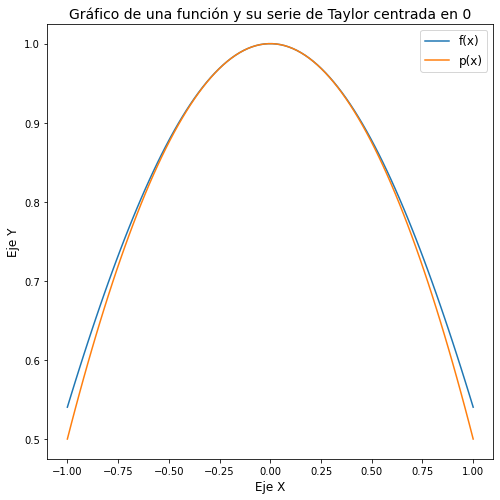

In [6]:
plt.figure(figsize=(8, 8)) # Tamaño

plt.plot(x_array, f(x_array), label="f(x)")
plt.plot(x_array, p(x_array), label="p(x)")
plt.title("Gráfico de una función y su serie de Taylor centrada en 0", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.xlabel("Eje X", fontsize=12)
plt.ylabel("Eje Y", fontsize=12)
plt.show()


Un comentario posible a esta gráfica: Vemos que el polinomio aproxima muy bien a la función cerca del 0, mientras que lejos de este empieza a comportarse mal. Aquí podemos ingresar también el gráfico del error para ver cuál es su magnitud en los distintos puntos.

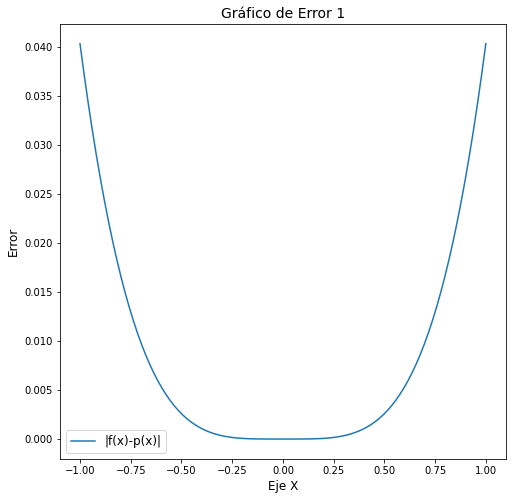

In [12]:
plt.figure(figsize=(8, 8)) # Tamaño

plt.plot(x_array, abs(f(x_array)-p(x_array)), label="|f(x)-p(x)|")
plt.title("Gráfico de Error 1", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.xlabel("Eje X", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.show()

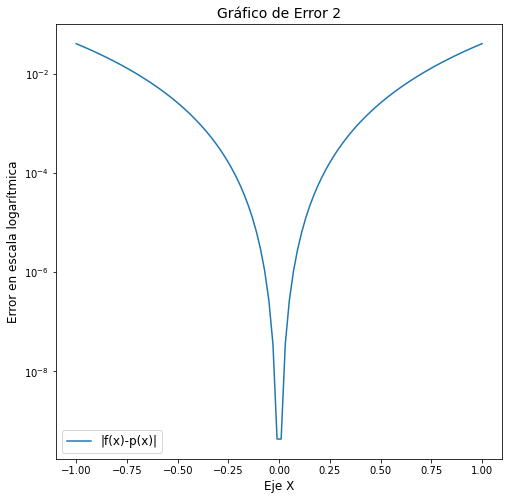

In [11]:
plt.figure(figsize=(8, 8)) # Tamaño

plt.plot(x_array, abs(f(x_array)-p(x_array)), label="|f(x)-p(x)|")
plt.title("Gráfico de Error 2", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.xlabel("Eje X", fontsize=12)
plt.ylabel("Error en escala logarítmica", fontsize=12)
plt.yscale("log")
plt.show()